In [1]:
#import pandas as pd
#from skimage.color import rgb2gray
#from skimage.transform import resize
#from skimage.feature import hog
#from skimage.feature import local_binary_pattern
#import os
# import cv2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn

import FeatureExtractor as fe

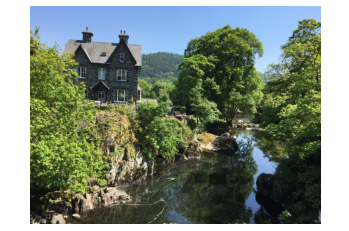

In [2]:
img = mpimg.imread('betws_y_coed_small.jpg')
plt.imshow(img)
plt.axis('Equal')
plt.axis('Off')
plt.show()
#cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Number of features =  54


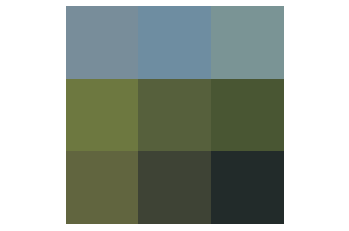

In [3]:
# Check RGB features

# Split the image into 3 rows and 3 columns
rgb = fe.fox_get_colour_features(img, blocks_r = 3, blocks_c = 3)
print('Number of features = ', len(rgb))

# Reshape as an image
block_img = np.reshape(rgb,(-1,3))
block_img = block_img[0:-1:2,:] # array with mean RGB for the blocks
block_img = np.reshape(np.reshape(block_img,(-1,1)),(3,3,3),order = 'C').astype(int)

plt.figure()
plt.imshow(block_img)
plt.axis('Equal')
plt.axis('Off')
plt.show()



Number of features =  54


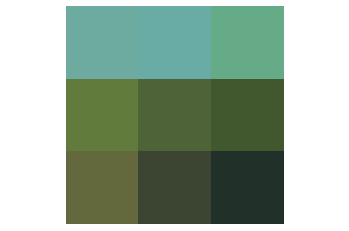

In [4]:
# Check HSV features 


# Split the image into 3 rows and 3 columns
hsv = fe.fox_get_colour_features(img, fstr = 'HSV', blocks_r = 3, blocks_c = 3)
print('Number of features = ', len(hsv))

# Reshape as an image
block_img = np.reshape(hsv,(-1,3))
block_img = block_img[0:-1:2,:] # array with mean HSV for the blocks
block_img = np.reshape(np.reshape(block_img,(-1,1)),(3,3,3),order = 'C')

from skimage.color import hsv2rgb
block_img = hsv2rgb(block_img) # convert back to RGB to view

plt.figure()
plt.imshow(block_img)
plt.axis('Equal')
plt.axis('Off')
plt.show()



Number of features =  36


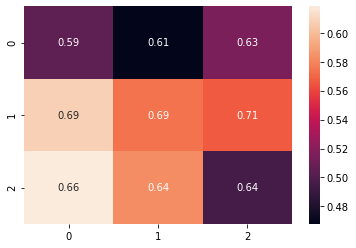

In [5]:
# Check Chrominance features
chro = fe.fox_get_colour_features(img, fstr = 'CHR', blocks_r = 3, blocks_c = 3)
print('Number of features = ', len(chro))

# Visualise C1 by colour and C2 by number
# Reshape
block_img = np.reshape(chro,(-1,2))
block_img = block_img[0:-1:2,:] # array with mean Chrominance for the blocks
block_img = np.reshape(np.reshape(block_img,(-1,1)),(2,3,3),order = 'F')
c1 = np.transpose(block_img[0])
c2 = np.transpose(block_img[1])

plt.figure()
sn.heatmap(c1,annot = c2)
plt.show()

Number of features =  54


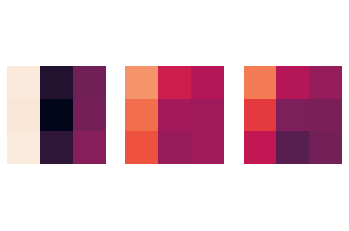

In [6]:
# Check Ohta features
oht = fe.fox_get_colour_features(img, fstr = 'OHT', blocks_r = 3, blocks_c = 3)
print('Number of features = ', len(oht))

# Reshape as an image
block_img = np.reshape(oht,(-1,3))
block_img = block_img[0:-1:2,:] # array with mean Ohta for the blocks
block_img = np.reshape(np.reshape(block_img,(-1,1)),(3,3,3),order = 'C')

# Visualise as 3 matrices
v1 = np.min(block_img); v2 = np.max(block_img)
plt.figure()
plt.subplot(131)
sn.heatmap(block_img[0], vmin = v1, vmax = v2, cbar = False)
plt.axis('Equal')
plt.axis('Off')
plt.subplot(132)
sn.heatmap(block_img[1], vmin = v1, vmax = v2, cbar = False)
plt.axis('Equal')
plt.axis('Off')
plt.subplot(133)
sn.heatmap(block_img[2], vmin = v1, vmax = v2, cbar = False)
plt.axis('Equal')
plt.axis('Off')
plt.show()

Number of features =  16


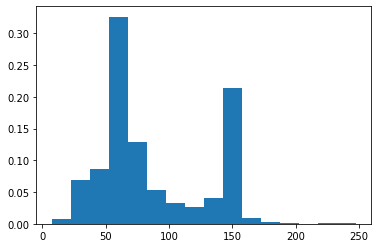

In [14]:
# Check H histogram
h = fe.fox_get_colour_features(img, fstr = 'H', blocks_r = 1, blocks_c = 1, bins = 16)
print('Number of features = ', len(h))
xx = np.linspace(0,255,18)
plt.figure
plt.bar(xx[1:-1],h,width=15)
plt.show()